# Lab: Forecasting

In this lab, we will explore the time series data and use different time series modeling technique for forecasting. We will mainly use APIs from the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html).

In [1]:
# # install packages
# import sys

# !conda install --yes --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import logging
import warnings
warnings.filterwarnings('ignore')
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Time Series Decomposition
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise. These components are defined as follows:

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

### Additive Decomposition

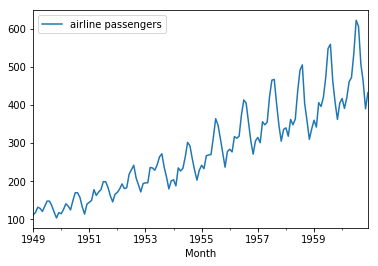

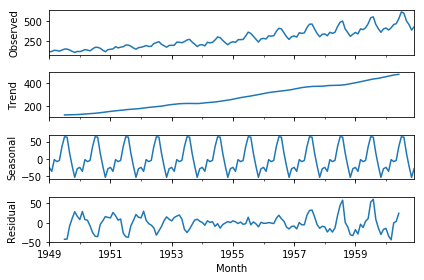

In [3]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)

df.plot()
pyplot.show()

result = seasonal_decompose(df['airline passengers'], model='additive')
result.plot()
pyplot.show()

### Multiplicative Decomposition

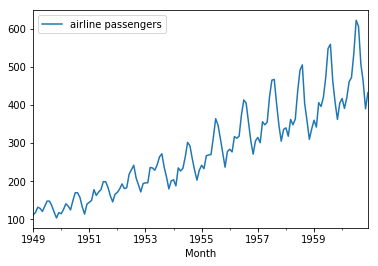

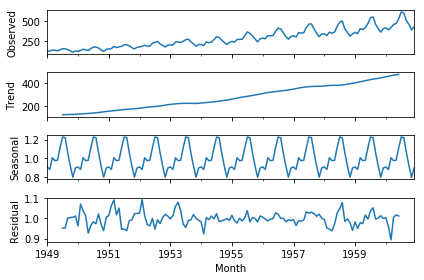

In [4]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)

df.plot()
pyplot.show()

result = seasonal_decompose(df['airline passengers'], model='multiplicative')
result.plot()
pyplot.show()

## Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# fit model
model = SimpleExpSmoothing(df['airline passengers'])
model_fit = model.fit(smoothing_level=0.5)
# make prediction
z = model_fit.predict(len(df), len(df))
print(z)

1961-01-01    439.256026
Freq: MS, dtype: float64


## Holt Winter’s Exponential Smoothing (HWES)
The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# fit model
model = ExponentialSmoothing(df['airline passengers'])
model_fit = model.fit()

# make prediction
z = model_fit.predict(len(df), len(df))
print(z)

1961-01-01    432.0
Freq: MS, dtype: float64


-----

## ARIMA model

### Autoregression model

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

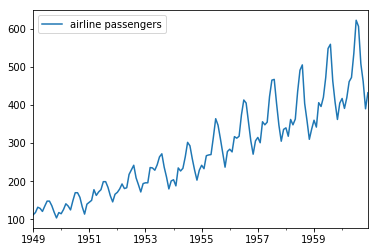

1961-01-01    427.964119
1961-02-01    424.093984
1961-03-01    420.382788
1961-04-01    416.824003
1961-05-01    413.411370
1961-06-01    410.138888
1961-07-01    407.000799
1961-08-01    403.991586
1961-09-01    401.105956
1961-10-01    398.338832
1961-11-01    395.685349
Freq: MS, dtype: float64


In [7]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

df.plot()
pyplot.show()

# fit model
p = 2
model = AR(df['airline passengers'])
model_fit = model.fit(maxlag=1)

# make prediction
z = model_fit.predict(len(df), len(df)+10)
print(z)

### Moving Average Model

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps. A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

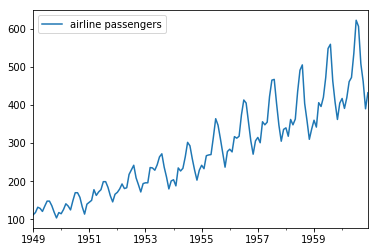

1961-01-01    425.108699
1961-02-01    280.647098
1961-03-01    280.647098
1961-04-01    280.647098
1961-05-01    280.647098
1961-06-01    280.647098
1961-07-01    280.647098
1961-08-01    280.647098
1961-09-01    280.647098
1961-10-01    280.647098
1961-11-01    280.647098
Freq: MS, dtype: float64


In [8]:
# MA example
from statsmodels.tsa.arima_model import ARMA

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

df.plot()
pyplot.show()

# fit model
model = ARMA(df['airline passengers'], order=(0, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(len(df), len(df)+10)
print(z)

## Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps. It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

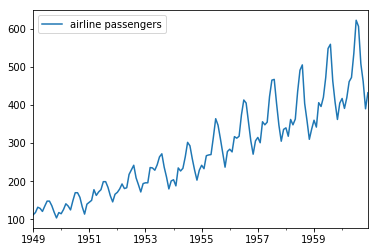

1961-01-01    470.010174
1961-02-01    440.517357
1961-03-01    442.194223
1961-04-01    430.309131
1961-05-01    425.100903
1961-06-01    417.374870
1961-07-01    411.272384
1961-08-01    404.894094
1961-09-01    399.078487
1961-10-01    393.424731
1961-11-01    388.094469
Freq: MS, dtype: float64


In [9]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

df.plot()
pyplot.show()

# fit model
model = ARMA(df['airline passengers'], order=(2, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(len(df), len(df)+10)
print(z)

### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

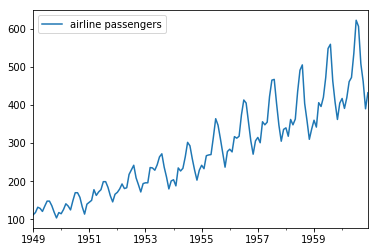

1961-01-01    470.452564
1961-02-01    492.562837
1961-03-01    498.437464
1961-04-01    494.724278
1961-05-01    488.709790
1961-06-01    485.047366
1961-07-01    485.156742
1961-08-01    488.230751
1961-09-01    492.653482
1961-10-01    497.052505
1961-11-01    500.737004
Freq: MS, dtype: float64


In [10]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

df.plot()
pyplot.show()

# fit model
model = ARIMA(df['airline passengers'], order=(2, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
z = model_fit.predict(len(df), len(df)+10, typ='levels')
print(z)

# End of Lab: Forecasting